In [17]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from PIL import Image, ImageDraw, ImageFont
import requests
import black

In [15]:
# scrape 1 latest photo
response = requests.get(
    f"https://eismoinfo.lt/eismoinfo-backend/camera-info-table/4044?pageNumber=0&pageSize=1"
).content.decode()
with open(
    r"C:\Users\User\PycharmProjects\CodeAcademy\Galutinis_projektas\Photos_for_model\Photo.jpg",
    "wb",
) as f:
    response = requests.get(json.loads(response).get("info")[0]["image"])
    f.write(response.content)

Kraunasi automobilis


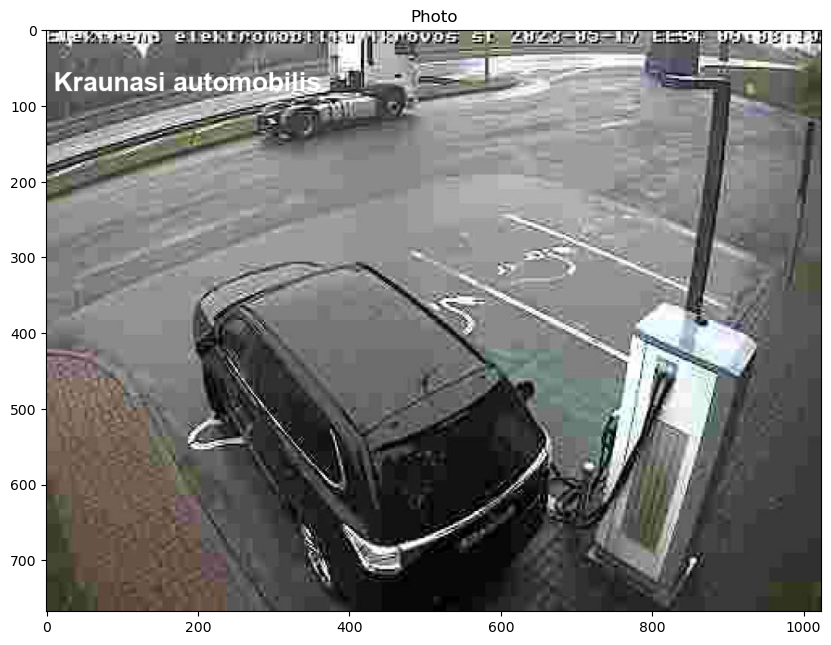

In [16]:
image_size = (128, 128)
classes = {0: "Nesikrauna automobilis", 1: "Kraunasi automobilis"}

# Load the saved model
model = load_model(
    "C:/Users/User/PycharmProjects/CodeAcademy/Galutinis_projektas/model/binary_v1._augmented_dataset.hdf5"
)

# Define the list of image names
source_directory = (
    "C:/Users/User/PycharmProjects/CodeAcademy/Galutinis_projektas/Photos_for_model"
)
image_names = os.listdir(source_directory)
image_paths = [(source_directory + "/" + image_name) for image_name in image_names]

# Set up the figure with three subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Loop over the image names and plot each image with predicted text
for i, image_name in enumerate(image_paths):
    # Load the image
    img = load_img(image_name, target_size=image_size)

    # Preprocess the image
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the class probabilities
    preds = model.predict(x, verbose=False, use_multiprocessing=True)
    predicted_class = classes[int(round(preds[0, 0], 0))]

    print(predicted_class)

    # Open the image with PIL
    img = Image.open(image_name)

    # Draw the text on the image
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("arialbd.ttf", 35)
    draw.text((10, 50), predicted_class, font=font)

    # Plot the image with predicted text
    # ax = axes[i]
    ax.imshow(img)
    ax.set_title(image_names[i].split(".")[0])

plt.show()